In [2]:
import pandas as pd

In [3]:
!pip install tensorflow

In [4]:
!pip install scikit-learn

In [5]:
!pip install scikit-learn

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models





In [7]:
from keras.datasets import cifar10

In [8]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [9]:
X_test.shape

(10000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_test.shape

(10000, 1)

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [15]:
cifar10

<module 'keras.api.datasets.cifar10' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\keras\\api\\datasets\\cifar10\\__init__.py'>

In [16]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [17]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

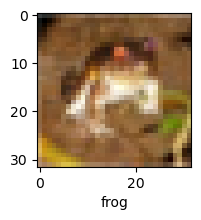

In [18]:
plot_sample(X_train, y_train, 0)

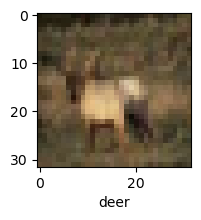

In [19]:
plot_sample(X_train, y_train, 3)

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 74ms/step - accuracy: 0.3085 - loss: 1.9275
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.4168 - loss: 1.6447
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 109s 70ms/step - accuracy: 0.4554 - loss: 1.5451
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 70ms/step - accuracy: 0.4780 - loss: 1.4904
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 70ms/step - accuracy: 0.4962 - loss: 1.4350


In [22]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.49      0.53      1000
           1       0.76      0.35      0.48      1000
           2       0.35      0.41      0.38      1000
           3       0.36      0.34      0.35      1000
           4       0.50      0.32      0.39      1000
           5       0.42      0.36      0.39      1000
           6       0.43      0.72      0.54      1000
           7       0.68      0.42      0.52      1000
           8       0.54      0.72      0.62      1000
           9       0.47      0.67      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.47     10000
weighted avg       0.51      0.48      0.47     10000



In [23]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Define the CNN model
cnn = models.Sequential([
    # Convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    # Max pooling layer with 2x2 pool size
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    # Max pooling layer with 2x2 pool size
    layers.MaxPooling2D((2, 2)),
    
    # Flatten layer to convert 2D output to 1D
    layers.Flatten(),
    # Fully connected layer with 64 units and ReLU activation
    layers.Dense(64, activation='relu'),
    # Output layer with 10 units and softmax activation for classification
    layers.Dense(10, activation='softmax')
])

In [25]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.3806 - loss: 1.6974
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6025 - loss: 1.1291
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6586 - loss: 0.9803
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6920 - loss: 0.8784
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7208 - loss: 0.8106
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7448 - loss: 0.7443
Epoch 7/10
1408/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7623 - loss: 0.6836

In [ ]:
cnn.evaluate(X_test,y_test)


In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
y_test[:5]

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

In [ ]:
classes[y_classes[3]]

In [ ]:
plot_sample(X_test, y_test,7)

In [ ]:
classes[y_classes[7]]

In [ ]:
import pickle

In [ ]:
filename  = "Finalised_CNN_model.pickle"
pickle.dump(cnn, open(filename,"wb"))